<a href="https://colab.research.google.com/github/cymroanvikas/cymroanvikas/blob/main/cvp2112_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: TF-IDF Analysis of the Focus on Finance in COP28 Coverage by Media Organisations

## Introduction & Research Question

Climate action has become increasingly prominent in the global sustainability zeitgeist with various stakeholders taking steps to mitigate or adapt to the impacts of climate change. Especially with the 28th Conference of Parties (COP28) just passed, recommendations and guidance on effective and timely climate action are being generated for governments, businesses, and financial institutions.

Commentary on COP28 has been inundated with recaps, reflections and criticisms by multilateral organisations, the media, governments and regulators. As such, various opinions have been levied for and against the deal. My research will focus on the emphasis media organisations have placed on finance in discussing the COP28.

Scaling finance for sustainability, climate mitigation and adaptation has been a priority for decades, and yet gaps remain in funds allocated to such activities. Additionally, much of the focus of COP28 (and previous such conferences) has continued to be on scaling sustainable and climate finance. COP28 involved many wins for sustainable finance, including a total of $85 billion committed to climate finance, a boost to the Green Climate Fund, pledges to the Loss and Damage Fund, new commitments towards the Least Developed Countries and Special Climate Change Funds, and general commitments to adaptation, food, water, health and other initiatives (Yahoo Finance, 2023 & UNCC, 2023).

While COP28 also invovles other agreements and achivements that are all equally important to the sustainability and climate action discourse, finance remains a key enabler to achieving agreements established in this deal. While this argument may be clear to sustainable finance professionals, it is important to reflect on how significantly finance is discussed in the larger sustainability discourse.

To this end, my research focusses on the emphasis media organisations place on finance in their coverage of COP28. I chose media organisations as they they aim to inform of the public discourse of sustainability and climate action. The chosen articles focused specifically on COP28, the deal made at the conference and other highlights of the conference. I conducted a Term Frequency-Inverse Document Frequency (TF-IDF) analysis to identify how frequently words related to finance appear in COP28 coverage. Through this analysis, I argue that the signfiicance of finance remains limited in the public discourse around sustainability and climate action, despite its criticality in achieving sustainability.


## Methodology

Data collection involved internet searches for articles that covered COP28 . Such articles were then collected into an Excel file (later converted to a .CSV file for analysis). This being said, there were specific rules I set around what articles could include. The articles had to be:
* Focussed on COP28 - these could outline the deal points, analyse or criticise other highlights around the conference, but they had to centered around the events at the conference
* About COP28 highlights in general - these could not overtly focus on finance raised at the conference or specific funds that were launched/renewed. This would bias the results and overstate the criticality of finance in the corpus of articles
* Country/region-agnostic - these could not focus on the impact of the COP28 deal or other achievements on a specific country or region due to the fact that this may bias the results, skewed towards the context of the country/region

Following data collection, I scraped the websites, cleaned the data using the Beautiful Soup and NLTK libraries. I then created word clouds to understand the most common words in each of the articles.

I used the TF-IDF score with the TFidVectorizer, after which specifically identified the TF-IDF scores for the following list of words: 'finance', 'investment', 'fund', 'funding', 'cost', 'price','bank', 'financial', 'invest', 'budget', 'market', 'bank'. These words are all related to the term 'finance' and in my view, most likley to be included in COP28 coverage. I also calculated scores for the most commonly used words in the entire corpus of articles, and chose the lowest TF-IDF-scored, most common words with finance-related terms to provide a comparison of the scores and comment on the signficance of finance in the corpus.

All code in this project was used from Professor Krisel's Intro to Text Analysis course, specifically from the Week 6: Web-Scraping and Week 10: TF-IDF workshops. On the other hand, ChatGPT was used to troubleshoot and provide amended code to correct my errors in this project.

##  Basic Set Up

Importing relevant libraries, mounting Google Drive and establishing .CSV files

In [ ]:
import requests
from bs4 import BeautifulSoup
import wordcloud
import nltk
import pandas as pd
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/files'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_df= pd.read_csv("/content/drive/MyDrive/python_project/urls_copy.csv", delimiter=',')
data_df

,Org,Title,URL
0,Politico,COP28 ends with first-ever call to move away f...,https://www.politico.com/news/2023/12/12/newes...
1,Grist,How an oil executive led the world to an agree...,https://grist.org/international/cop28-climate-...
2,UN News,COP28 ends with call to ‘transition away’ from...,https://news.un.org/en/story/2023/12/1144742
3,UNCC,COP28 Agreement Signals “Beginning of the End”...,https://unfccc.int/news/cop28-agreement-signal...
4,Inside Climate News,COP28 Does Not Deliver Clear Path to Fossil Fu...,https://insideclimatenews.org/news/13122023/co...
5,BBC,Countries call for global move away from fossi...,https://www.bbc.com/news/live/world-67674841?a...
6,BBC,COP28: Landmark summit takes direct aim at fos...,https://www.bbc.com/news/science-environment-6...
7,UN News,Climate advocates demand stronger COP28 langua...,https://news.un.org/en/story/2023/12/1144677
8,Aljazeera,Historic COP28 deal agrees to ‘transition away...,https://www.aljazeera.com/news/2023/12/13/new-...
9,Aljazeera,COP28 draft deal slammed for dropping call to ...,https://www.aljazeera.com/news/2023/12/11/cop2...


## Data Scraping & Cleaning
Installing Selenium, which would help in bypassing JavaScript encoding, since some articles in the corpus could not be scraped without it.

Automating retrival of the HTML content from each article specified by the URLs in the .CSV file and adding in a 'text' column to store HTML data.


In [ ]:
!pip install selenium # this code was provide by ChatGPT

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 461.6/461.6 kB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.9 MB/s eta 0:00:00


In [ ]:
!apt-get update
!apt-get install chromium chromium-driver

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [637 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,305 kB]
Get:9 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,599 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:13 ht

In [ ]:
def web_driver():
      options = webdriver.ChromeOptions()
      options.add_argument("--verbose")
      options.add_argument('--no-sandbox')
      options.add_argument('--headless')
      options.add_argument('--disable-gpu')
      options.add_argument("--window-size=1920, 1200")
      options.add_argument('--disable-dev-shm-usage')
      driver = webdriver.Chrome(options=options)
      return driver

In [ ]:
# this code was provided by ChatGPT
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

def scrape_articles(url):

    # Create a WebDriver instance
    driver = web_driver()

    # Load the webpage
    driver.get(url)

    # Wait for a few seconds to let JavaScript content load
    driver.implicitly_wait(5)

    # Get the page source after JavaScript content has loaded
    html_string = driver.page_source

    # Close the WebDriver
    driver.quit()

    return html_string

In [ ]:
data_df['text'] = data_df['URL'].apply(scrape_articles)
data_df

,Org,Title,URL,text
0,Politico,COP28 ends with first-ever call to move away f...,https://www.politico.com/news/2023/12/12/newes...,"<html lang=""en"" class=""no-js""><!--<![endif]-->..."
1,Grist,How an oil executive led the world to an agree...,https://grist.org/international/cop28-climate-...,"<html class=""js canvas canvastext no-emoji fle..."
2,UN News,COP28 ends with call to ‘transition away’ from...,https://news.un.org/en/story/2023/12/1144742,"<html lang=""en"" dir=""ltr"" prefix=""og: https://..."
3,UNCC,COP28 Agreement Signals “Beginning of the End”...,https://unfccc.int/news/cop28-agreement-signal...,"<html lang=""en"" dir=""ltr"" prefix=""content: htt..."
4,Inside Climate News,COP28 Does Not Deliver Clear Path to Fossil Fu...,https://insideclimatenews.org/news/13122023/co...,"<html lang=""en-US""><head>\n<meta charset=""UTF-..."
5,BBC,Countries call for global move away from fossi...,https://www.bbc.com/news/live/world-67674841?a...,"<html lang=""en-gb"" class=""b-pw-1280 b-reith-sa..."
6,BBC,COP28: Landmark summit takes direct aim at fos...,https://www.bbc.com/news/science-environment-6...,"<html><head><meta charset=""utf-8""><meta name=""..."
7,UN News,Climate advocates demand stronger COP28 langua...,https://news.un.org/en/story/2023/12/1144677,"<html lang=""en"" dir=""ltr"" prefix=""og: https://..."
8,Aljazeera,Historic COP28 deal agrees to ‘transition away...,https://www.aljazeera.com/news/2023/12/13/new-...,"<html lang=""en"" dir=""ltr"" class=""theme-aje"" st..."
9,Aljazeera,COP28 draft deal slammed for dropping call to ...,https://www.aljazeera.com/news/2023/12/11/cop2...,"<html lang=""en"" dir=""ltr"" class=""theme-aje"" st..."


 Using the BeautifulSoup library to convert the HTML content to readable text in the 'text' column and saving the cleaned data to a text file named 'all_articles.tct'

In [ ]:
with open("all_articles.txt", "w") as file:
    for text in data_df['text']:
        soup = BeautifulSoup(text, 'html.parser')
        article = soup.get_text()
        file.write(article)

Creating a directory called files and building a for loop to convert the HTML data in the 'text' column to readable text for further analysis. Also creating a individual text files for each article.


In [ ]:
! mkdir files

In [ ]:
id = 0
for text in data_df['text']:
    soup = BeautifulSoup(text)
    article = soup.get_text()

    id += 1
    with open(f"files/article_{id}.txt", "w") as file:
        file.write(str(article))

Downloading the NLTK library for cleaning the text data

In [ ]:
import nltk
nltk.download('stopwords')

nltk.download('wordnet')

nltk.download('punkt')

nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords
stops = stopwords.words('english')

from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import glob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Creating a directory called files_cleaned to store all the cleaned data, and creating a directory called wordclouds to save the PNG files for all wordclouds generated.

In [ ]:
! mkdir files_cleaned

In [ ]:
! mkdir wordclouds

In [ ]:
directory = "files"
files = glob.glob(f"{directory}/*.txt")

In [ ]:
files

['files/article_20.txt',
 'files/article_1.txt',
 'files/article_17.txt',
 'files/article_14.txt',
 'files/article_19.txt',
 'files/article_7.txt',
 'files/article_5.txt',
 'files/article_15.txt',
 'files/article_4.txt',
 'files/article_13.txt',
 'files/article_3.txt',
 'files/article_6.txt',
 'files/article_16.txt',
 'files/article_11.txt',
 'files/article_8.txt',
 'files/article_2.txt',
 'files/article_10.txt',
 'files/article_9.txt',
 'files/article_18.txt',
 'files/article_12.txt',
 'files/article_21.txt']

POS tagging for lemmatized words

In [ ]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

Cleaning all the data in each individual text files, creating new folders called article_cleaned to store the cleaned data in the files_cleaned directory.

Creating word clouds and saving them to the wordclouds directory.

Calculating lexical density for each article and printing it with the wordclouds

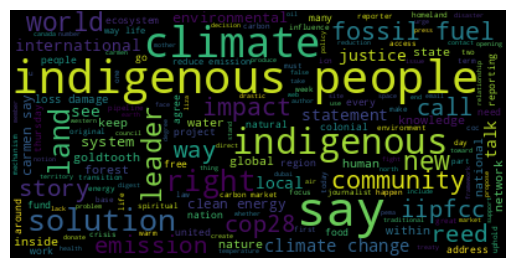

0.575


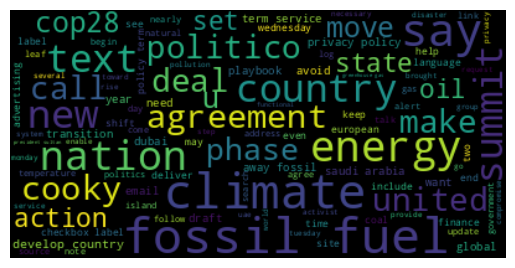

0.6716666666666666


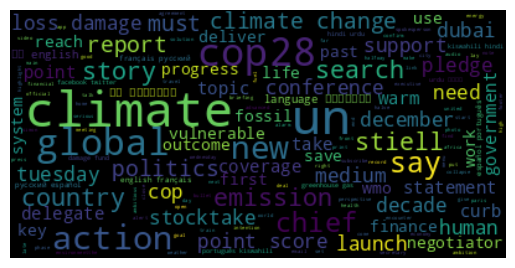

0.585


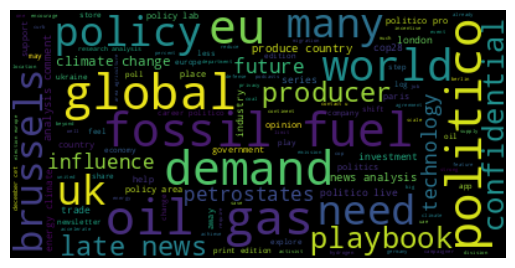

0.6116666666666667


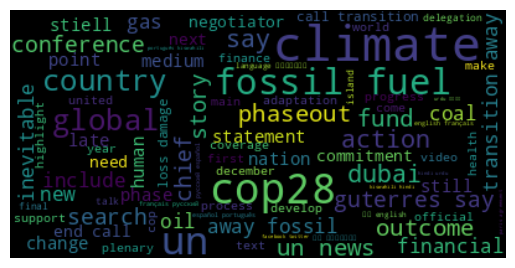

0.5766666666666667


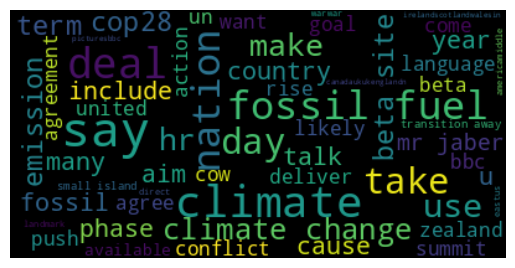

0.6433333333333333


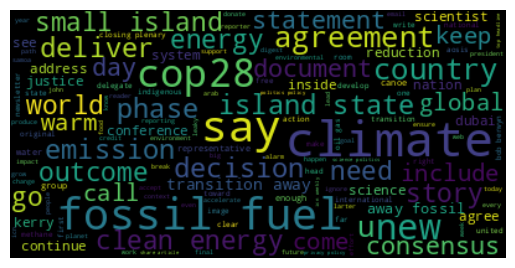

0.635


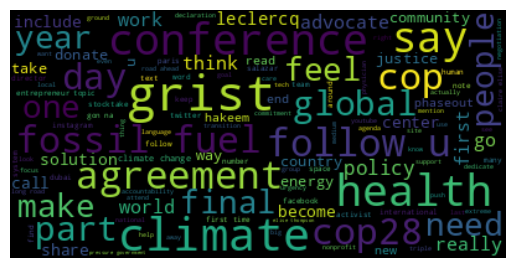

0.57


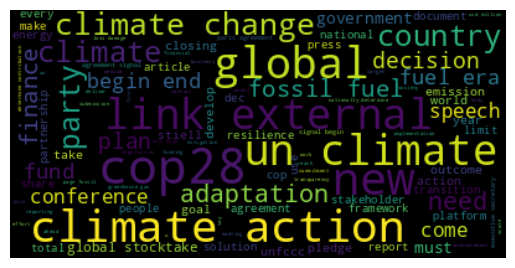

0.565


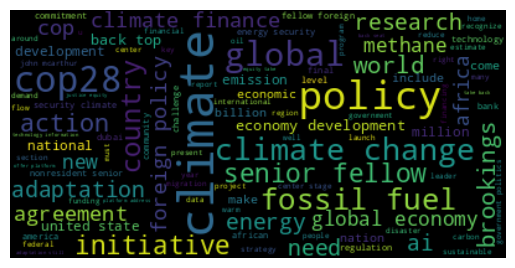

0.45


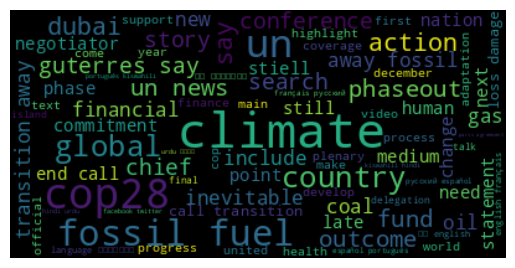

0.5766666666666667


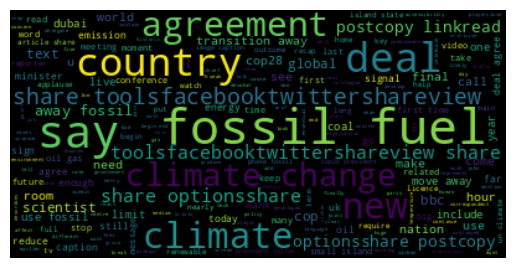

0.6016666666666667


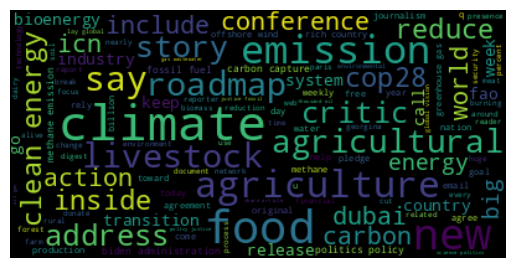

0.6333333333333333


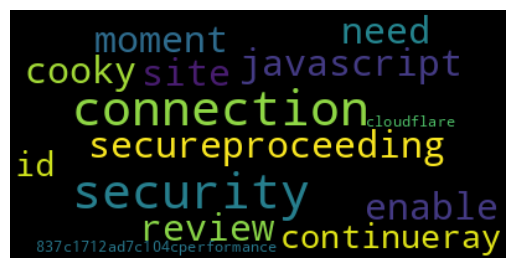

0.875


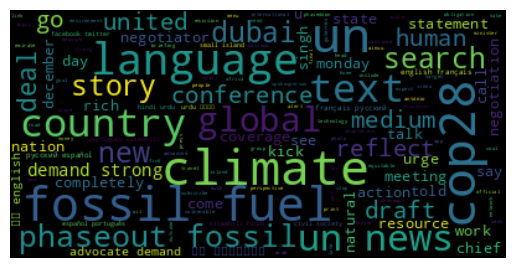

0.5666666666666667


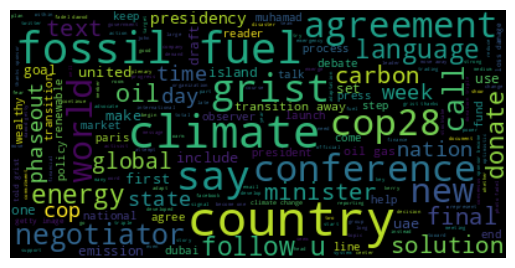

0.6383333333333333


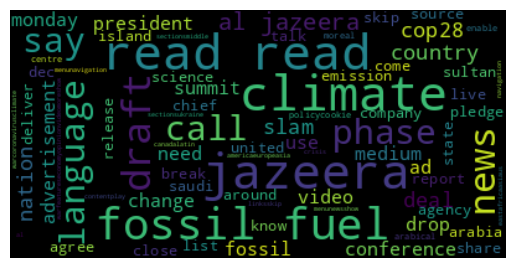

0.6865384615384615


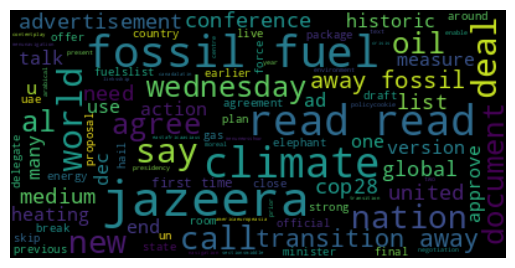

0.6583333333333333


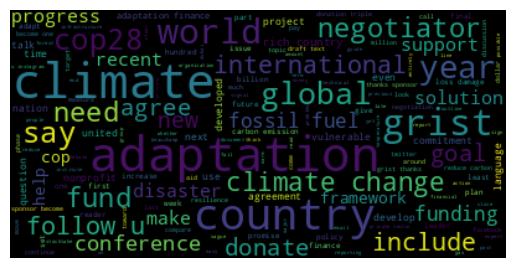

0.58


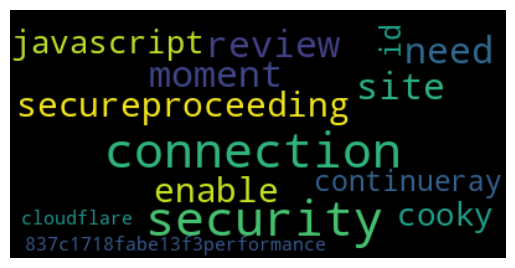

0.875


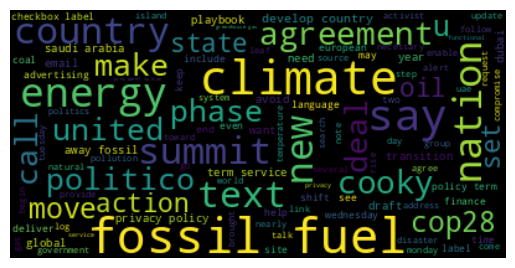

0.6716666666666666
[{'File_name': 'files/article_20.txt', 'lexical_density': 0.575}, {'File_name': 'files/article_1.txt', 'lexical_density': 0.6716666666666666}, {'File_name': 'files/article_17.txt', 'lexical_density': 0.585}, {'File_name': 'files/article_14.txt', 'lexical_density': 0.6116666666666667}, {'File_name': 'files/article_19.txt', 'lexical_density': 0.5766666666666667}, {'File_name': 'files/article_7.txt', 'lexical_density': 0.6433333333333333}, {'File_name': 'files/article_5.txt', 'lexical_density': 0.635}, {'File_name': 'files/article_15.txt', 'lexical_density': 0.57}, {'File_name': 'files/article_4.txt', 'lexical_density': 0.565}, {'File_name': 'files/article_13.txt', 'lexical_density': 0.45}, {'File_name': 'files/article_3.txt', 'lexical_density': 0.5766666666666667}, {'File_name': 'files/article_6.txt', 'lexical_density': 0.6016666666666667}, {'File_name': 'files/article_16.txt', 'lexical_density': 0.6333333333333333}, {'File_name': 'files/article_11.txt', 'lexical_densi

In [ ]:
import glob
import os

lexical_density = []

for filepath in files:
    text = open(filepath, encoding='utf-8').read()
    text_tokens = nltk.word_tokenize(text, language='english')
    nltk_text = nltk.Text(text_tokens)
    text_lower = [t.lower() for t in nltk_text if t.isalnum()]
    text_stops = [t for t in text_lower if t not in stops]
    text_clean = [WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in text_stops]

    # Gets the filepath, identifies the number from previous file name to create new (cleaned) file
    file_number = os.path.basename(filepath).split("_")[1].split(".")[0]

   # Save the cleaned files with the correct naming format
    new_filename = f"files_cleaned/article_cleaned_{file_number}.txt"
    with open(new_filename, "w") as file:
        file.write(str(text_clean))

    # create Word Clouds
    if text_clean:  # Check if text_clean is not empty before generating word cloud
        unique_string = " ".join(text_clean)
        wordcloud = WordCloud(max_font_size=40).generate(unique_string)
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

        # save Word Clouds
        #wordcloud.to_file(f"wordclouds/word_cloud_{id}.png")
        wordcloud.to_file(f"wordclouds/word_cloud_{file_number}.png")

        # Establish lexical density
        text_clean_slice = text_clean[0:600]
        ld_results = len(set(text_clean_slice)) / len(text_clean_slice)
        print(ld_results)
        ld_dict = {'File_name': filepath, 'lexical_density': ld_results}
        lexical_density.append(ld_dict)

print(lexical_density)

In [ ]:
print(wordcloud.words_.keys())

dict_keys(['fossil fuel', 'climate', 'say', 'energy', 'nation', 'new', 'summit', 'country', 'text', 'agreement', 'cooky', 'call', 'politico', 'united', 'deal', 'make', 'phase', 'cop28', 'move', 'u', 'state', 'action', 'oil', 'set', 'develop country', 'global', 'playbook', 'dubai', 'transition', 'year', 'avoid', 'want', 'need', 'draft', 'email', 'away fossil', 'saudi arabia', 'privacy policy', 'term service', 'end', 'finance', 'wednesday', 'two', 'help', 'shift', 'time', 'language', 'deliver', 'coal', 'keep', 'see', 'european', 'even', 'include', 'label', 'may', 'site', 'advertising', 'policy term', 'checkbox label', 'search', 'politics', 'alert', 'follow', 'log', 'nearly', 'day', 'update', 'link', 'begin', 'address', 'temperature', 'talk', 'source', 'agree', 'island', 'note', 'leaf', 'government', 'natural', 'gas', 'come', 'pollution', 'rise', 'disaster', 'compromise', 'system', 'step', 'world', 'go', 'activist', 'provide', 'group', 'necessary', 'several', 'brought', 'uae', 'monday', '

The most common terms visualised in the word clouds include 'fossil fuel', 'climate', 'energy', 'nation', 'summit', 'country', 'agreement', 'united', 'deal', and 'phase'. Some words such as 'say', 'new' and 'cooky' that feature in the top 10 were removed due to their lack of relevance in the context of this research.

Given that these articles focus on the events of COP28 and the deal achieved at the conference, terms such as fossil fuel, climate and energy are highly relevant and so, most commonly used in the corpus of the articles.

Note: despite using the Selenium tool, 2 articles continue to return issues as demonstrated in the word clouds. The results from these articles will be ignored in further research.

## Understanding the significance of finance

Before diving into the TF-IDF analysis, I wanted to understand the context within which terms such as 'finance', 'fund', 'funding' and 'investment' were used in the corpus of articles.

In [ ]:
import os

word = 'finance'
directory = '/content/files'

for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)

        # Open and read the content of the current file
        with open(file_path, 'r') as current_file:
            lines = current_file.readlines()

            # Check if the string is present in any line of the current file
            for line_number, line in enumerate(lines):
                if word in line:
                    print(f'String "{word}" found in file: {filename}')
                    print('Line Number:', line_number + 1)  # Adding 1 to make it human-readable
                    print('Line:', line)
                    print('-' * 30)  # Separator for better readability


String "finance" found in file: article_1.txt
Line Number: 530
Line: But the final text delivered on a major request from developing nations by strengthening calls to boost finance to help them switch to cleaner energy systems. It noted the importance of “scaling up new and additional grant-based, highly concessional finance, and non-debt instruments” to enable energy transitions.

------------------------------
String "finance" found in file: article_17.txt
Line Number: 598
Line: Mr. Stiell’s strong message to government negotiators comes as the latest UN climate conference, running in the UAE’s main city, Dubai, since last Thursday, reaches the halfway mark with agreement on financing for climate adaptation and the fate of fossil fuels still up in the air. “All governments must give their negotiators clear marching orders". "We need highest ambition, not point scoring or lowest common denominator politics,” said Mr. Stiell, who is the Executive Secretary of the UN climate convention,

In [ ]:
import os

word = 'fund'
directory = '/content/files'

for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)

        # Open and read the content of the current file
        with open(file_path, 'r') as current_file:
            lines = current_file.readlines()

            # Check if the string is present in any line of the current file
            for line_number, line in enumerate(lines):
                if word in line:
                    print(f'String "{word}" found in file: {filename}')
                    print('Line Number:', line_number + 1)  # Adding 1 to make it human-readable
                    print('Line:', line)
                    print('-' * 30)  # Separator for better readability


String "fund" found in file: article_20.txt
Line Number: 197
Line: They called for creation of a mechanism for presenting grievances when carbon trading and offset schemes might impact the rights and lands of Indigenous peoples, strategies that prioritize the prevention of catastrophic loss and damage from climate change, direct access to funds when damage occurs, the equitable phaseout of fossil fuels and a just transition that respects Indigenous rights and knowledge.

------------------------------
String "fund" found in file: article_20.txt
Line Number: 328
Line: On Thursday, world leaders greenlit the creation of a “loss and damage” fund to help developing countries cope with increasingly devastating climate impacts. It’s another issue at the top of IIPFCC’s agenda.

------------------------------
String "fund" found in file: article_20.txt
Line Number: 330
Line: Indigenous peoples from all regions must be able to directly access funds and influence how decisions are made, Carmen 

In [ ]:
import os

word = 'funding'
directory = '/content/files'

# Iterate through files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)

        # Open and read the content of the current file
        with open(file_path, 'r') as current_file:
            lines = current_file.readlines()

            # Check if the string is present in any line of the current file
            for line_number, line in enumerate(lines):
                if word in line:
                    print(f'String "{word}" found in file: {filename}')
                    print('Line Number:', line_number + 1)  # Adding 1 to make it human-readable
                    print('Line:', line)
                    print('-' * 30)  # Separator for better readability

String "funding" found in file: article_20.txt
Line Number: 352
Line: Eighty percent of Earth’s biodiversity lies within Indigenous lands, including roughly a third of intact forests. Yet Indigenous people and local communities receive less than 1 percent of global funding for climate and biodiversity and lack direct access to this funding. States must make significant investments in nature and “high-integrity ecosystems” with Indigenous peoples and local communities taking an active part in crafting solutions, Raj said, “as they are the best guardians of nature.”

------------------------------
String "funding" found in file: article_1.txt
Line Number: 531
Line: Finance like interest-free funding and below-market rate terms are seen as essential to avoid deepening developing countries’ debt burdens and drawing capital to regions the private sector typically avoids. The text recognized that maintaining “sufficient fiscal space” enables climate action.

------------------------------
St

In [ ]:
import os

word = 'investment'
directory = '/content/files'

for filename in os.listdir(directory):
    if filename.endswith(".txt"):  # Assuming you're looking for text files
        file_path = os.path.join(directory, filename)

        # Open and read the content of the current file
        with open(file_path, 'r') as current_file:
            lines = current_file.readlines()

            # Check if the string is present in any line of the current file
            for line_number, line in enumerate(lines):
                if word in line:
                    print(f'String "{word}" found in file: {filename}')
                    print('Line Number:', line_number + 1)  # Adding 1 to make it human-readable
                    print('Line:', line)
                    print('-' * 30)  # Separator for better readability


String "investment" found in file: article_20.txt
Line Number: 350
Line: Some non-governmental organizations at COP28 are pushing for a redoubling of efforts to transition away from fossil fuels while boosting investments in locally led natured-based solutions to reduce emissions. 

------------------------------
String "investment" found in file: article_20.txt
Line Number: 352
Line: Eighty percent of Earth’s biodiversity lies within Indigenous lands, including roughly a third of intact forests. Yet Indigenous people and local communities receive less than 1 percent of global funding for climate and biodiversity and lack direct access to this funding. States must make significant investments in nature and “high-integrity ecosystems” with Indigenous peoples and local communities taking an active part in crafting solutions, Raj said, “as they are the best guardians of nature.”

------------------------------
String "investment" found in file: article_14.txt
Line Number: 1335
Line: Secon

As seen from the results, there are are mulitple references of to terms related to finance. However, it is critical to understand their signficance within the corpus. The next section will calculate the TF-IDF scores for these terms to determine this.

In [ ]:
ld_df = pd.DataFrame(lexical_density)
ld_df = ld_df.sort_values(by='File_name', ascending=True)
ld_df

,File_name,lexical_density
1,files/article_1.txt,0.671667
16,files/article_10.txt,0.686538
13,files/article_11.txt,0.875000
19,files/article_12.txt,0.875000
9,files/article_13.txt,0.450000
3,files/article_14.txt,0.611667
7,files/article_15.txt,0.570000
12,files/article_16.txt,0.633333
2,files/article_17.txt,0.585000
18,files/article_18.txt,0.580000


## TF-IDF Analysis
Importing the sklearn library, TfidVectorizer and CountVectorizer

In [ ]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
pd.options.display.max_rows = 600
from pathlib import Path
import glob

In [ ]:
directory_path = "files_cleaned/"

In [ ]:
text_files = glob.glob(f"{directory_path}/*.txt")
text_titles = [Path(text).stem for text in text_files]

Calculating the TF-IDF score using TfidVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(input='filename', stop_words='english')

In [ ]:
tfidf_vector = tfidf_vectorizer.fit_transform(text_files)

In [ ]:
type(tfidf_vector)

scipy.sparse._csr.csr_matrix

Creating a Pandas DataFrame for each term across each article, and establishing the list of terms for the DataFrame

In [ ]:
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
tfidf_df.loc['00_Document Frequency'] = (tfidf_df > 0).sum()

In [ ]:
tfidf_slice = tfidf_df[['finance', 'investment', 'fund', 'funding', 'price','bank', 'financial', 'invest', 'budget', 'market', 'banking']]
tfidf_slice.sort_index().round(decimals=2)

,finance,investment,fund,funding,price,bank,financial,invest,budget,market,banking
00_Document Frequency,15.00,4.00,13.00,6.00,4.00,5.00,12.00,3.00,3.00,8.00,1.00
article_cleaned_1,0.04,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
article_cleaned_10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
article_cleaned_11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
article_cleaned_12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
article_cleaned_13,0.08,0.04,0.04,0.04,0.01,0.06,0.03,0.00,0.01,0.03,0.01
article_cleaned_14,0.00,0.08,0.00,0.00,0.01,0.00,0.03,0.03,0.02,0.01,0.00
article_cleaned_15,0.00,0.00,0.02,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00
article_cleaned_16,0.02,0.00,0.02,0.00,0.00,0.02,0.03,0.00,0.00,0.03,0.00
article_cleaned_17,0.05,0.00,0.07,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00


The DataFrame shows the TF-IDF scores of the terms finance', 'investment', 'fund', 'funding', 'price','bank', 'financial', 'invest', 'budget', 'market' and 'bank'. The terms 'finance' (15.00), 'fund' (13.00), and 'financial' (12.00), appear in 15, 13, and 12 out of the 21 articles, respectively. On the other hand, the terms 'banking' (1.00), 'budget' (3.00), and 'bank' (5.00) appear in 1, 3 and 5 out of the 21 articles, respectively.

This being said, the TF-IDF score of each term remains quite low. For instance, the term 'finance' despite appearing in 15 out of 21 articles, at best, carries the score of 0.09 (specifically in article_cleaned_4). 'fund' at best, carries the score of 0.10 (specifically in article_cleaned_3, article_cleaned_18 and article_cleaned_19). Lastly, 'financial' at best carries the score of 0.07 (in article_cleaned_19).

These scores demonstrate that despite being present in several of articles from the corpus, the significance and uniqueness of the terms remains low. We can compare the results across words most commonly found in the word clouds.

In [ ]:
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
tfidf_df.loc['00_Document Frequency'] = (tfidf_df > 0).sum()

In [ ]:
tfidf_slice = tfidf_df[['fossil', 'fuel', 'climate', 'energy', 'summit', 'oil', 'agreement', 'deal', 'phase', 'gas', 'transition']]
tfidf_slice.sort_index().round(decimals=2)

,fossil,fuel,climate,energy,summit,oil,agreement,deal,phase,gas,transition
00_Document Frequency,19.00,19.00,19.00,18.00,14.00,17.00,19.00,15.00,16.00,17.00,17.00
article_cleaned_1,0.20,0.20,0.18,0.14,0.14,0.06,0.08,0.09,0.08,0.06,0.05
article_cleaned_10,0.17,0.13,0.15,0.00,0.05,0.02,0.01,0.07,0.08,0.00,0.00
article_cleaned_11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
article_cleaned_12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
article_cleaned_13,0.08,0.08,0.36,0.08,0.00,0.03,0.04,0.00,0.01,0.03,0.04
article_cleaned_14,0.07,0.07,0.10,0.06,0.02,0.12,0.02,0.02,0.00,0.11,0.01
article_cleaned_15,0.10,0.09,0.18,0.04,0.00,0.01,0.10,0.00,0.01,0.00,0.03
article_cleaned_16,0.04,0.04,0.18,0.10,0.02,0.03,0.03,0.00,0.01,0.06,0.04
article_cleaned_17,0.04,0.02,0.40,0.03,0.02,0.00,0.02,0.03,0.03,0.04,0.01


In comparison, terms such as 'fossil', 'fuel', 'climate' and 'agreement' appear in 19 out of the 21 articles in the corpus (with a score of 19.00).

The term 'fossil' carries a score of 0.22 in article_cleaned_6 and article_cleaned_6, and 0.21 in article_cleaned_3 and article_cleaned_19. The term 'climate' has even better scores, with a 0.42 in article_cleaned_4, 0.40 in article_cleaned_17. 'Deal' also carries a score of 0.20 in article_cleaned_6 and 0.16 in article_cleaned_4. These represent much stronger results and demonstrate that these terms are more significant in the corpus of articles.

However, given that all the articles in the corpus are centered around COP28, terms such as 'fossil', 'fuel', 'climate', and 'agreement' are expected to be highly significant in the corpus. This being said, other terms in this list carry higher scores than the finance term scores. Specifically, terms such as 'phase', 'gas' and 'transition'. This can be seen by comparing these 3 terms across the finance terms with the highest document frequency.

In [ ]:
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
tfidf_df.loc['00_Document Frequency'] = (tfidf_df > 0).sum()

In [ ]:
tfidf_slice = tfidf_df[['finance', 'fund', 'financial', 'phase', 'gas', 'transition']]
tfidf_slice.sort_index().round(decimals=2)

,finance,fund,financial,phase,gas,transition
00_Document Frequency,15.00,13.00,12.00,16.00,17.00,17.00
article_cleaned_1,0.04,0.00,0.00,0.08,0.06,0.05
article_cleaned_10,0.00,0.00,0.00,0.08,0.00,0.00
article_cleaned_11,0.00,0.00,0.00,0.00,0.00,0.00
article_cleaned_12,0.00,0.00,0.00,0.00,0.00,0.00
article_cleaned_13,0.08,0.04,0.03,0.01,0.03,0.04
article_cleaned_14,0.00,0.00,0.03,0.00,0.11,0.01
article_cleaned_15,0.00,0.02,0.00,0.01,0.00,0.03
article_cleaned_16,0.02,0.02,0.03,0.01,0.06,0.04
article_cleaned_17,0.05,0.07,0.03,0.03,0.04,0.01


This DataFrame shows that despite having high document frequency, terms related to finance score on average lower than other commonly used words in this corpus of articles. 'Phase', 'gas' and 'transition' score more regularly above 0.05 than 'finance', 'fund' and 'financial'.

Number of instances of scores at 0.05 or above:
* 'Finance' = 4
* 'Fund' = 5
* 'Financial' = 2
* 'Phase' = 7
* 'Gas' = 7
* 'Transition' = 9

On the other hand, number of instances of scores at 0.02 or below:
* 'Finance' = 12
* 'Fund' = 13
* 'Financial' = 13
* 'Phase' = 11
* 'Gas' = 5
* 'Transition' = 8

This shows that finance-related terms are scored lower on average compared to other common words in the corpus of the articles.

In [ ]:
tfidf_df.stack().reset_index()
tfidf_df = tfidf_df.stack().reset_index()
tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document','level_1': 'term'})
tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)

,document,term,tfidf
86197,00_Document Frequency,need,20.000000
83783,00_Document Frequency,2023,19.000000
83954,00_Document Frequency,agreement,19.000000
84398,00_Document Frequency,change,19.000000
84452,00_Document Frequency,climate,19.000000
84548,00_Document Frequency,conference,19.000000
84588,00_Document Frequency,content,19.000000
84626,00_Document Frequency,cop28,19.000000
84665,00_Document Frequency,country,19.000000
85045,00_Document Frequency,emission,19.000000


In [ ]:
top_tfidf = tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)

We can now visually see a heatmap of the top 10 words with the highest TF-IDF scores of the corpus of articles.

In [ ]:
import altair as alt
import numpy as np
import re
term_list = ['financing', 'finance']

# code to filter out exlcuded words, numeric terms, specific language names and non-English characters was provided by ChatGPT

# List of words to be excluded
exclude_list = ['grist', 'follow', 'year', 'concretezero', 'long', 'think', 'read', 'human', 'absolute', 'like', 'ep100', 'end', 'ev100', 'amaze', 'reach', 'ein', 'absolute', 'absolutely', 'include', 'normal', 'area', 'able', '28th', 'wmo', 'eu', 'uk', 'iipfcc', 'abstract', 'abandon', 'absence', 'really', 'na' 'hindi', 'español', 'english', 'français', 'kiswahili', 'português', 'urdu', 'closecurlyquote', 'fao', 'salazar', 'gon', 'december', 'hakeem', 'away', 'biden', 'incapsula', 'leclercq', 'stiell', 'recent', 'say', 'cop28', 'feel', 'cop', 'day', 'politico', 'text', 'saudi', 'arabia', 'avoid', 'confidential', 'live', 'comment', 'edition', 'score', 'news', 'point', 'story', 'id', 'page', 'under2', '404', '1102909', 'guterres', 'dubai', 'carmen', 'reed', 'way', 'address', 'icn', 'jazeera', 'connection', 'toolsfacebooktwittershareview', '837c1712ad7c104cperformance',
'837c1718ad7c13f3cperformance', 'postcopy', 'hr', 'brookings', 'optionsshare', 'secureproceeding', 'na', 'linkread', 'javascript', 'cloudflare', 'countinueray', 'review', 'enable', 'moment', 'link', 'bob', 'wednesday', 'al', 'canoe', 'share', 'ad', 'advertisement', 'search', 'berwyn', 'hindi', 'bbc']

# Exclude unwanted terms from the original DataFrame
filtered_df = tfidf_df[~tfidf_df['term'].isin(exclude_list)]
,
# Exclude terms that are numeric or specific language names
filtered_df = filtered_df[~filtered_df['term'].str.match(r'^\d+$')]  # Exclude numeric terms
filtered_df = filtered_df[~filtered_df['term'].str.match(r'^(english|spanish|french)$', case=False)]  # Exclude specific language names
filtered_df = filtered_df[filtered_df['term'].str.match(r'^[a-zA-Z0-9_]*$')] # Exclude non-English characters


# Sort and group by document, then take the top 20 terms based on tf-idf score
top_tfidf = filtered_df.sort_values(by=['document', 'tfidf'], ascending=[True, False]).groupby(['document']).head(10)

# Adding randomness to break ties in term ranking
top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0]) * 0.0001

# Base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x='rank:O',
    y=alt.Y('document:N', title='Document', axis=alt.Axis(labels=False)),  # Hide the axis labels
).transform_window(
    rank="rank()",
    sort=[alt.SortField("tfidf", order="descending")],
    groupby=["document"],
)

# Heatmap specification
heatmap = base.mark_rect().encode(
    color=alt.Color('tfidf:Q', scale=alt.Scale(scheme='viridis', domain=[0, 1]))  # Adjust the color scale
)

# Red circle over terms in the above list
circle = base.mark_circle(size=100, opacity=0.7).encode(
    color=alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('#FF0000FF'),  # Increase opacity for better visibility
        alt.value('#FFFFFF00')
    )
)

# Text labels, always white
text = base.mark_text(baseline='middle').encode(
    text='term:N',
    color=alt.value('white')  # Always set to white
)

# Display the three superimposed visualizations
(heatmap + circle + text).properties(width=1700, height=300)


alt.LayerChart(...)

## Analysis
The heatmap shows the words in each article that have the highest (denoted by teal) TF-IDF scores to the lowest (denoted by dark purple). Words such as 'climate', 'fossil' and 'fuel' expectedly hold the top 2 ranks in all articles. Whereas terms related to finance do not feature heavily in this heatmap. The first instance of a word related to finance is 'fund' ranked 6th in row 10. In fact, there are only 3 instances of a term related to finance appearing in the top 10 higly ranked words in the whole corpus. This demonstrates that words such as 'finance', 'fund', 'funding' do not carry much weight in the corpus of articles.

Note: the 2 articles that were unable to be scraped, as seen in the word clouds are represented in this heatmap in rows #3 and #4. They would be excluded from analysis.



## Limitations

While the news organisations whose articles are included in the corpus are reputed, the extent to which this analysis can be extrapolated to comment on the  emphasis on finance that the entire sustainability and climate discourse is limited. This is mainly because it was not possible to use other larger and more reputable news sources given that they were behind paywalls. These included publications such as Reuters, the Guardian, Bloomberg, the New York Times and the Washington Post, among others. This project could also not glean insights from multilateral organisations other than the UNCC and UN News, due to the fact that web scraping was not permitted on these websites. These included organisations such as the World Bank, UNEP, UNEP-FI, UNFCCC, UNDP, IMF and IFC, among others.

This was also a critical reason for the limitation in the number of articles in the corpus used.

The focus of all articles in the corpus was on COP28, and so we are not able to gain more sweeping perspectives on the criticality of finance in sustainability discourse in general.

## Future Research
Despite the limitations, this research provides interesting insight into the signficance news organisations place on finance and as such, future research may assess a larger corpus of news articles, considering other inflection points or focussing events in sustainability and climate action. Additionally, future research may also consider reports by multilateral organisations to examine the emphasis these institutions place on finance as climate action.

## Conclusion

This project aimed at assessing the impetus news organisations covering COP28 placed on finance. I used web-scraping for data collection, word clouds for visualisations of the most commonly used words in a corpus of 21 articles and TF-IDF to analyse the text.


Through the word clouds, it was revealed that terms such as 'fossil fuel', 'climate' and 'energy' were the most commonly used words in the corpus. This is expected since COP28 focussed signficantly on these areas. Terms related to finance appeared much smaller on the word clouds, if at all. As for TF-IDF scores, terms related to finance such as 'fund', 'funding' 'financial' etc., received low scores, suggesting that they were not significant or unique in the corpus of articles. When compared with the lowest TF-IDF scored, most common words such as 'phase', 'gas' and 'transition', terms related to finance were demonstrably less significant.

The fact that the results of this analysis showed that terms related to finance do not score highly, despite appearing in multiple articles across the corpus, is surprising. This is considering that scaling sustainable finance for climate action was a critical part of COP28 and the deal that was signed at the conference. The larger sustainability and climate action discourse also places great emphasis on bridging financing gaps. We may conclude that limited signficance of finance in the corpus of articles chosen perhaps demonstrates public interest in other areas of sustainability. It may also be that these news articles do not cater to readers within the finance space and so, references to finance are kept to a minimal. Alternatively, news organisations in the corpus place greater importance on other areas of climate action and so chose to limit references to finance.

Ultimately, this research provides some insight into the importance of finance in the sustainability and climate action discourse, but also makes way for more detailed analysis to be conducted.